In [1]:
from google.colab import drive
drive.mount('/content/drive')

root_dir = '/content/drive/My Drive'

Mounted at /content/drive


In [2]:
!unzip '/content/drive/MyDrive/financial-inclusion-in-africa.zip'

Archive:  /content/drive/MyDrive/financial-inclusion-in-africa.zip
  inflating: StarterNotebook.ipynb   
  inflating: Train.csv               
  inflating: Test.csv                
  inflating: VariableDefinitions.csv  
  inflating: SampleSubmission.csv    


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [18]:
df = pd.read_csv('/content/Train.csv')
pd.set_option('display.max_columns', None)

In [26]:
df

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,18,uniqueid_1,1,Rural,1,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,18,uniqueid_2,0,Rural,0,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,18,uniqueid_3,1,Urban,1,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,18,uniqueid_4,0,Rural,1,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,18,uniqueid_5,0,Urban,0,8,26,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,18,uniqueid_2113,0,Rural,1,4,48,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,18,uniqueid_2114,0,Rural,1,2,27,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,18,uniqueid_2115,0,Rural,1,5,27,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,18,uniqueid_2116,0,Urban,1,7,30,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [20]:
df['bank_account'] = df['bank_account'].map({'Yes' : 1, 'No' : 0})

In [25]:
df['year'] = df['year'] % 100

In [22]:
df['cellphone_access'] = df['cellphone_access'].map({'Yes' : 1, 'No' : 0})

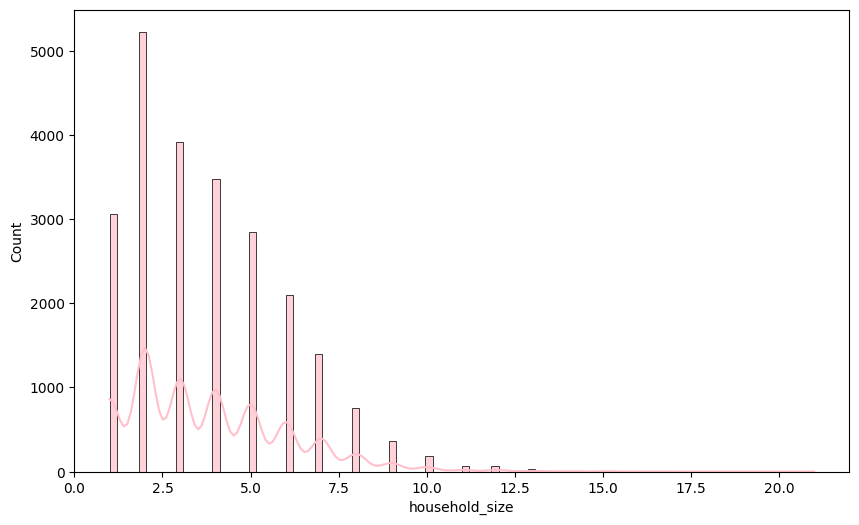

In [27]:
plt.figure(figsize = (10, 6))
sns.histplot(df['household_size'], color = 'pink', kde = True, alpha = 0.7)
plt.show()

In [28]:
X = df.drop(['bank_account', 'uniqueid'], axis = 1)
y = df['bank_account']

In [31]:
y.value_counts()

,count
bank_account,
0,20212
1,3312


In [32]:
!pip install catboost
from catboost import CatBoostClassifier

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 8.7 MB/s eta 0:00:00


In [37]:
from sklearn.model_selection import StratifiedKFold # For handling unbalanced target
from sklearn.metrics import accuracy_score

skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

accuracies = []

for train_index, test_index in skf.split(X, y):
  print(f'Fold: {len(accuracies) + 1}')

  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  cat_features = ['country', 'location_type', 'gender_of_respondent', 'relationship_with_head', 'marital_status', 'education_level', 'job_type']
  model = CatBoostClassifier(verbose = False, cat_features = cat_features)
  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  print(f'Accuracy: {accuracy}')

  accuracies.append(accuracy)

mean_accuracy = np.mean(accuracies)
print(f'Mean Accuracy: {mean_accuracy}')

Fold: 1
Accuracy: 0.8845908607863975
Fold: 2
Accuracy: 0.8886291179596174
Fold: 3
Accuracy: 0.8930924548352817
Fold: 4
Accuracy: 0.8843783209351753
Fold: 5
Accuracy: 0.88796768707483
Mean Accuracy: 0.8877316883182603
